# __Old Cars Data Analysis:__
#### _"What are the main characteristics which have the most impact on the car price?"_

## __0. Data Importation and Preparation__

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Import file into a df
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
cars_df = pd.read_csv(url, header=None)
print("The first five rows of the dataframe") 
cars_df.head(5)

The first five rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
print("The last ten rows of the dataframe") 
cars_df.tail(10)

The last ten rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [4]:
# Create headers list and replace them in the dataframe
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
cars_df.columns = headers
cars_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [5]:
cars_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
cars_df.shape

(205, 26)

## __1. Data Wrangling__

In [7]:
cars_df = cars_df.replace('?',np.NaN)

In [8]:
cars_df.isnull().sum().sort_values(ascending=False)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
num-of-doors          2
horsepower            2
engine-type           0
highway-mpg           0
city-mpg              0
compression-ratio     0
fuel-system           0
engine-size           0
num-of-cylinders      0
symboling             0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
curb-weight           0
dtype: int64

In [9]:
# Drop the rows with no price value 
cars_df = cars_df.dropna(subset=["price"], axis=0)

In [10]:
# Find "normalized-losses" mean in order to replace the missing values
avg_norm_loss = cars_df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)
cars_df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
print("Normalized losses missing values have been replaced by its mean")

Average of normalized-losses: 122.0
Normalized losses missing values have been replaced by its mean


In [11]:
avg_bore = cars_df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)
cars_df["bore"].replace(np.nan, avg_bore, inplace=True)
print("Bore missing values have been replaced by its mean")

Average of bore: 3.330710659898477
Bore missing values have been replaced by its mean


In [12]:
avg_stroke = cars_df['stroke'].astype('float').mean(axis=0)
print("Average of stroke:", avg_stroke)
cars_df["stroke"].replace(np.nan, avg_stroke, inplace = True)
print("Stroke missing values have been replaced by its mean")

Average of stroke: 3.256903553299492
Stroke missing values have been replaced by its mean


In [13]:
avg_horsepower = cars_df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)
cars_df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
print("Horse power missing values have been replaced by its mean")

Average horsepower: 103.39698492462311
Horse power missing values have been replaced by its mean


In [14]:
avg_peakrpm = cars_df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)
cars_df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)
print("Peak-rpm missing values have been replaced by its mean")

Average peak rpm: 5117.587939698493
Peak-rpm missing values have been replaced by its mean


In [15]:
# Find where 'num-of-doors' missing values are
np.where(pd.isnull(cars_df['num-of-doors']))

(array([26, 60], dtype=int64),)

In [16]:
cars_df.iloc[[26,60],]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [17]:
# Replace missing values accordingly to the rest of the entry
cars_df["num-of-doors"].replace(np.nan, "four", inplace=True)
cars_df.iloc[[26,60],]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148,dodge,gas,turbo,four,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558
63,0,122.0,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795


In [18]:
cars_df.isnull().sum().sort_values(ascending=False)

symboling            0
normalized-losses    0
highway-mpg          0
city-mpg             0
peak-rpm             0
horsepower           0
compression-ratio    0
stroke               0
bore                 0
fuel-system          0
engine-size          0
num-of-cylinders     0
engine-type          0
curb-weight          0
height               0
width                0
length               0
wheel-base           0
engine-location      0
drive-wheels         0
body-style           0
num-of-doors         0
aspiration           0
fuel-type            0
make                 0
price                0
dtype: int64

### 1.1 Data Formatting

In [19]:
#Convert data types to proper format
cars_df[["bore", "stroke", "price", "peak-rpm"]] = cars_df[["bore", "stroke", "price", "peak-rpm"]].astype("float")
cars_df[["normalized-losses", "horsepower"]] = cars_df[["normalized-losses", "horsepower"]].astype("int")
cars_df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### 1.2 Data Standarization

In [20]:
# Convert fuel consumption from mpg to L/100km
cars_df['highway-mpg'] = 235/cars_df["highway-mpg"]
cars_df.rename(columns={"highway-mpg":'highway-L/100km'}, inplace = True)
cars_df['city-mpg'] = 235/cars_df["city-mpg"]
cars_df.rename(columns={"city-mpg":"city-L/100km"}, inplace = True)
cars_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,11.190476,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,12.368421,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,9.791667,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,13.055556,10.681818,17450.0


###     1.3 Data Binning

Text(0.5, 1.0, 'Horsepower distribution')

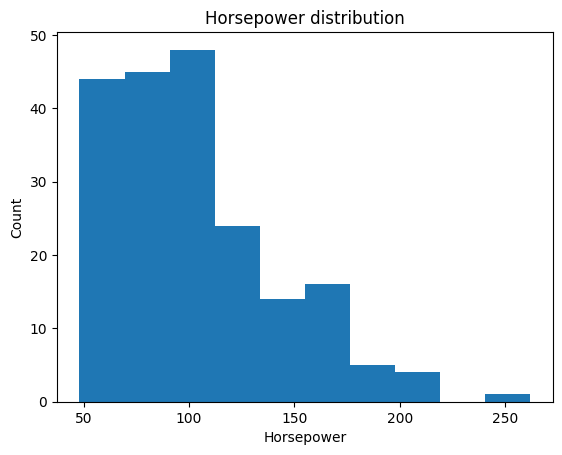

In [21]:
#In order to see what the distribution of horsepower looks like:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(cars_df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower distribution")

In [22]:
# To reduce the spectrum
horsepower_bins = np.linspace(min(cars_df["horsepower"]), max(cars_df["horsepower"]), 4)
horsepower_bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [23]:
group_names = ['Low', 'Medium', 'High']
cars_df['horsepower-binned'] = pd.cut(cars_df['horsepower'], horsepower_bins, labels=group_names, include_lowest=True )
cars_df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Text(0.5, 1.0, 'Horsepower bins')

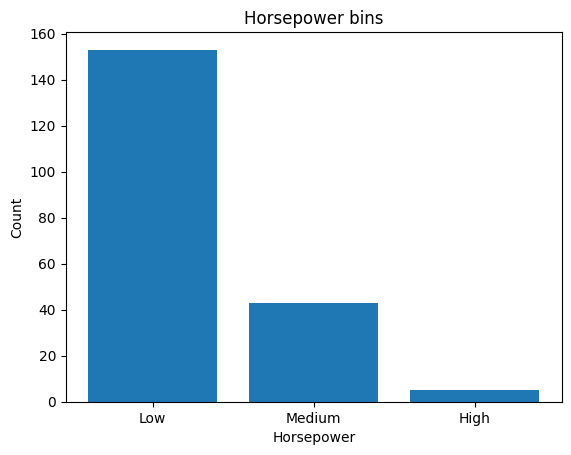

In [24]:
# Plot horsepower bins
pyplot.bar(group_names, cars_df["horsepower-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower bins")

## __2. Exploratory Data Analysis__

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
cars_df_numeric = cars_df.drop(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower-binned'], axis=1)
correlation_matrix = cars_df_numeric.corr()
correlation_matrix

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.075776,0.279719,0.066171,-0.029807,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.217300,0.239544,0.238567,0.181189,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,0.371297,-0.360233,0.476153,0.577576,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,0.579688,-0.286035,0.657373,0.707108,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,0.614972,-0.245852,0.673363,0.736728,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.086901,-0.309913,0.003811,0.084301,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,0.758001,-0.279350,0.785353,0.836921,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,0.822636,-0.256753,0.745059,0.783465,0.872335
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,0.566786,-0.267338,0.554726,0.559197,0.543154
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,0.097598,-0.063720,0.036285,0.047199,0.082267


In [27]:
cars_df_numeric.corrwith(cars_df['price'])

symboling           -0.082391
normalized-losses    0.133999
wheel-base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb-weight          0.834415
engine-size          0.872335
bore                 0.543154
stroke               0.082267
compression-ratio    0.071107
horsepower           0.809729
peak-rpm            -0.101542
city-L/100km         0.789898
highway-L/100km      0.801118
price                1.000000
dtype: float64

### 2.1 Visualizing strong correlations (values higher than |0.7|):

(0.0, 47919.937108054924)

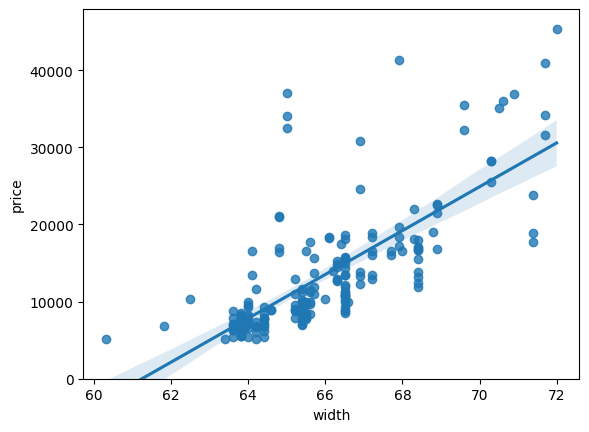

In [28]:
sns.regplot(x="width", y="price", data=cars_df)
plt.ylim(0,)

(0.0, 47759.224609417695)

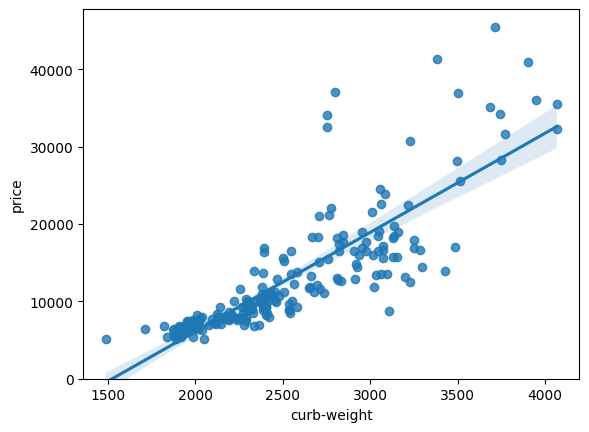

In [29]:
sns.regplot(x="curb-weight", y="price", data=cars_df)
plt.ylim(0,)

(0.0, 53139.52760891101)

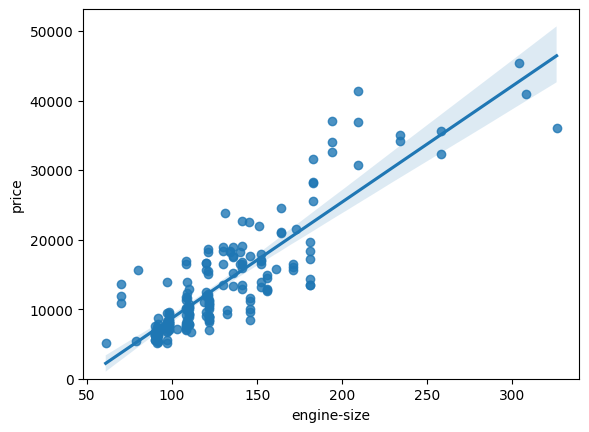

In [30]:
sns.regplot(x="engine-size", y="price", data=cars_df)
plt.ylim(0,)

(0.0, 47537.04457220741)

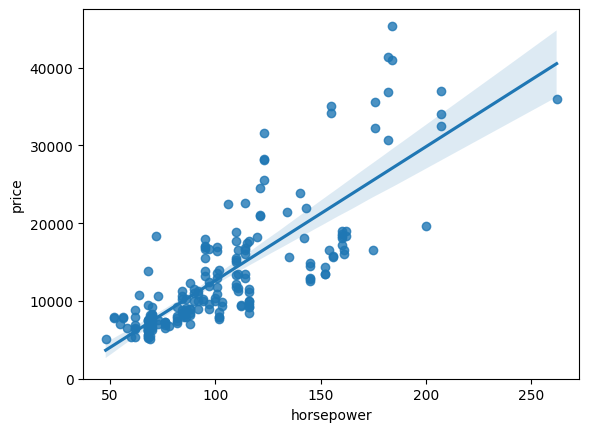

In [31]:
sns.regplot(x="horsepower", y="price", data=cars_df)
plt.ylim(0,)

(0.0, 47710.52174964346)

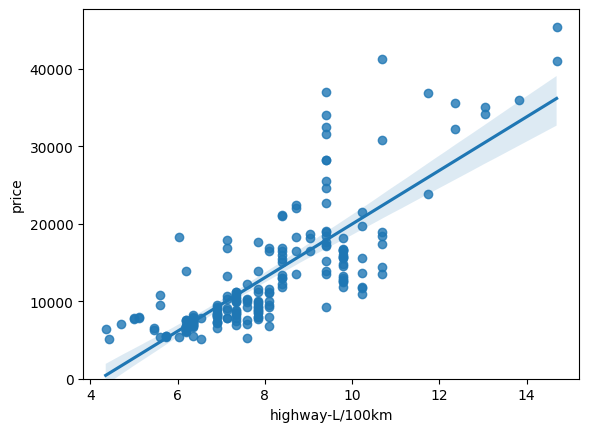

In [32]:
sns.regplot(x="highway-L/100km", y="price", data=cars_df)
plt.ylim(0,)

<Axes: xlabel='city-L/100km', ylabel='price'>

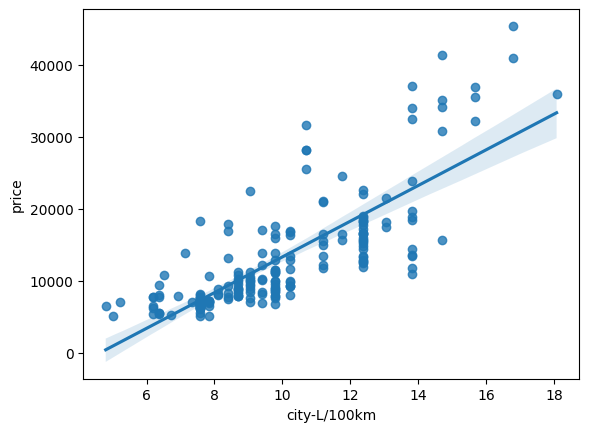

In [33]:
sns.regplot(x="city-L/100km", y="price", data=cars_df)

<Axes: xlabel='body-style', ylabel='price'>

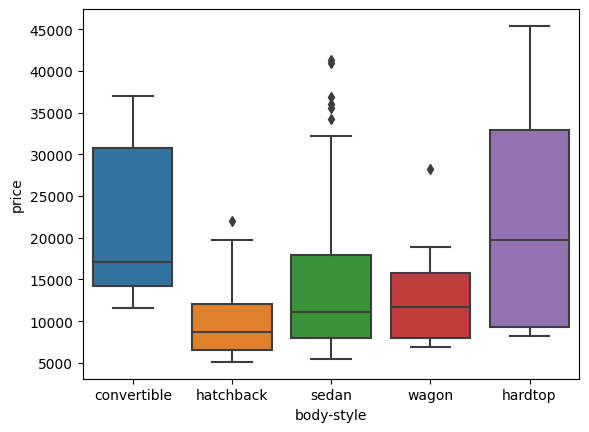

In [34]:
sns.boxplot(x="body-style", y="price", data=cars_df)

<Axes: xlabel='engine-location', ylabel='price'>

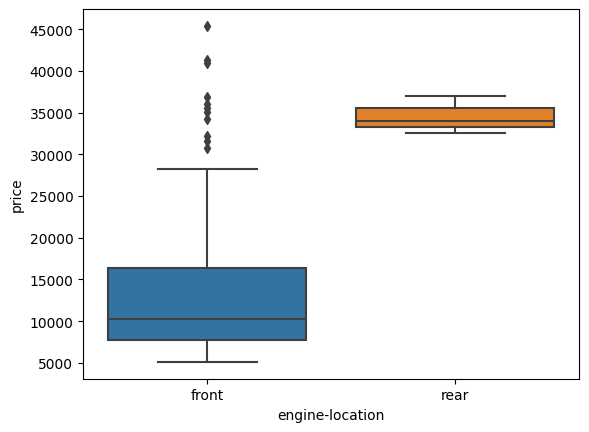

In [35]:
sns.boxplot(x="engine-location", y="price", data=cars_df)

<Axes: xlabel='drive-wheels', ylabel='price'>

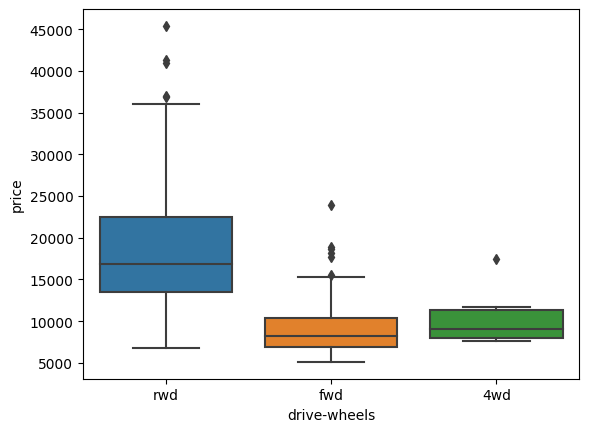

In [36]:
sns.boxplot(x="drive-wheels", y="price", data=cars_df)

### 2.2 Comparing in groups:

In [37]:
df_group_one = cars_df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group_one

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [38]:
grouped_pivot = df_group_one.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [39]:
# Fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

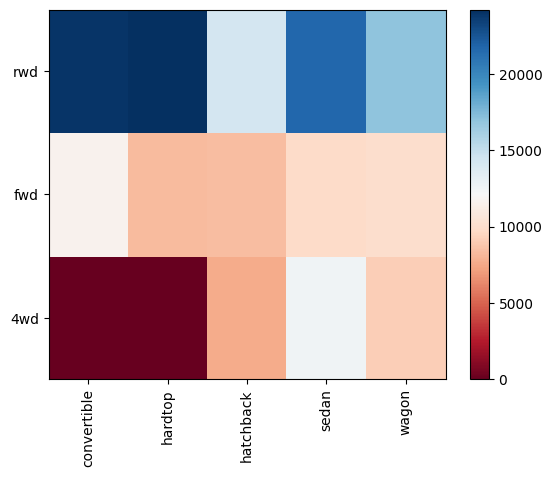

In [40]:
# Plot a heatmap to get a better visualization 
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# Label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### 2.3 Comparing Correlation and Causation

In [41]:
from scipy import stats

In [42]:
# Finding Pearson Correlation Coefficient and p-value for:

# Width and Price
pearson_coef1, p_value1 = stats.pearsonr(cars_df['width'], cars_df['price'])
# Curb weight and Price
pearson_coef2, p_value2 = stats.pearsonr(cars_df['curb-weight'], cars_df['price'])
# Engine size and Price
pearson_coef3, p_value3 = stats.pearsonr(cars_df['engine-size'], cars_df['price'])
# Horsepower and Price
pearson_coef4, p_value4 = stats.pearsonr(cars_df['horsepower'], cars_df['price'])
# Highway-L/100km and price
pearson_coef5, p_value5 = stats.pearsonr(cars_df['highway-L/100km'], cars_df['price'])
# City-L/100km and price
pearson_coef6, p_value6 = stats.pearsonr(cars_df['city-L/100km'], cars_df['price'])

# Storing the values in a dictonary
corr_and_caus = {'width and price': {'PCC':pearson_coef1,'P-value':p_value1},
                 'curb-weight and price': {'PCC':pearson_coef2,'P-value':p_value2},
                 'engine size and price': {'PCC':pearson_coef3,'P-value':p_value3},
                 'horsepower and price': {'PCC':pearson_coef4,'P-value':p_value4},
                 'highway-L/100km and price': {'PCC':pearson_coef5,'P-value':p_value5},
                 'city-L/100km and price': {'PCC':pearson_coef6,'P-value':p_value6}}

# Making it a df to get a better reading of the values
candc_df = pd.DataFrame(corr_and_caus)
candc_df

,width and price,curb-weight and price,engine size and price,horsepower and price,highway-L/100km and price,city-L/100km and price
PCC,7.512653e-01,8.344145e-01,8.723352e-01,8.097290e-01,8.011176e-01,7.898975e-01
P-value,9.200336e-38,2.189577e-53,9.265492e-64,5.924001e-48,3.046785e-46,3.903106e-44


In [43]:
# Sorting the dataframe by the variables values
sorted_candc_df = candc_df.sort_values(by = ['PCC', 'P-value'], axis = 1, ascending=False)
sorted_candc_df

,engine size and price,curb-weight and price,horsepower and price,highway-L/100km and price,city-L/100km and price,width and price
PCC,8.723352e-01,8.344145e-01,8.097290e-01,8.011176e-01,7.898975e-01,7.512653e-01
P-value,9.265492e-64,2.189577e-53,5.924001e-48,3.046785e-46,3.903106e-44,9.200336e-38


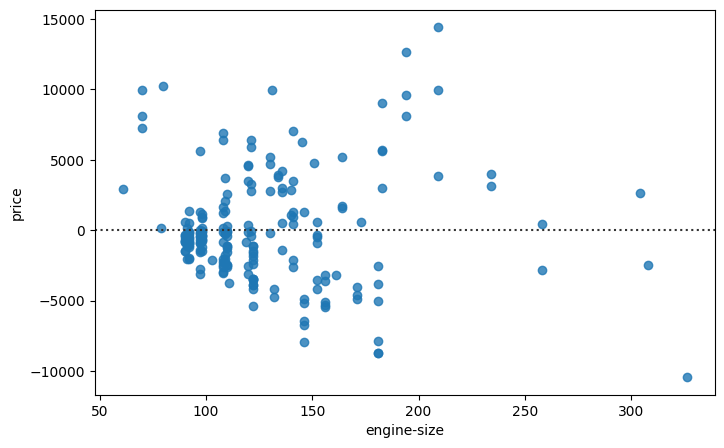

In [44]:
# Making a residual plot between price and engine size
width = 8
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x=cars_df['engine-size'], y=cars_df['price'])
plt.show()

## __3. Model Development__

### 3.1 Using Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
# Finding the linear regression relationship between price and engine size
lm1 = LinearRegression()
X = cars_df[['engine-size']]
Y = cars_df['price']
lm1.fit(X,Y)
lm1.intercept_

-7963.338906281024

In [47]:
lm1.coef_

array([166.86001569])

In [48]:
Yhat1 = lm1.intercept_ + lm1.coef_*X
Yhat1.head()

,engine-size
0,13728.463134
1,13728.463134
2,17399.383479
3,10224.402804
4,14729.623228


In [49]:
# Finding the R^2
model1_rsq = lm1.score(X, Y)
print('The R-square is: ', model1_rsq)

The R-square is:  0.7609686443622008


In [50]:
# Let's calculate the MSE:

# Predict the output:
Yhat=lm1.predict(X)
print('The output of the first four predicted value is:', Yhat1[0:4])

# Import the function mean_squared_error from the module metrics:
from sklearn.metrics import mean_squared_error

# Comparing the predicted results with the actual results:

model1_mse = mean_squared_error(cars_df['price'], Yhat1)
print('The mean square error of price and the predicted value is: ', model1_mse)

The output of the first four predicted value is:     engine-size
0  13728.463134
1  13728.463134
2  17399.383479
3  10224.402804
The mean square error of price and the predicted value is:  15021126.02517414


### 3.2 Using Multiple Linear Regression

In [51]:
Z = cars_df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']]
lm2 = LinearRegression()
lm2.fit(Z, cars_df['price'])
print('The intercet values is: ', lm2.intercept_, 'and the b1, b2, b3, b4 and b5 coefficients values are: ',lm2.coef_)

The intercet values is:  -14475.50988281929 and the b1, b2, b3, b4 and b5 coefficients values are:  [  12.98202961    3.57142146   94.80014628 -484.53470564  913.42773507]


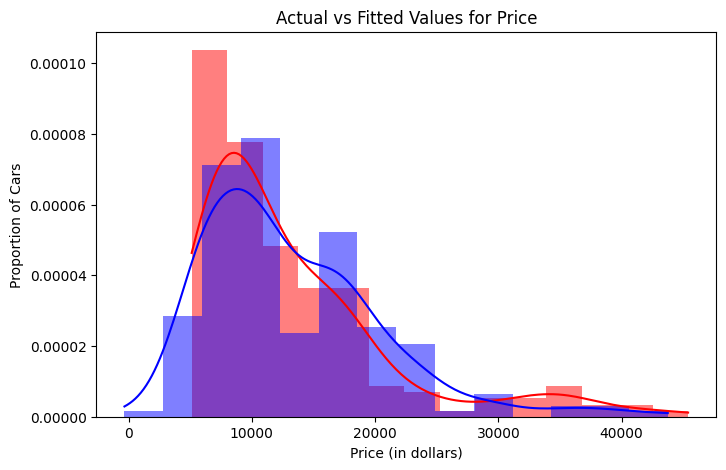

In [52]:
# Using a Histogram to visualize the difference of the distribution between fitted values and actual values
Y_hat = lm2.predict(Z)

plt.figure(figsize=(width, height))
sns.histplot(cars_df['price'], color="red", label="Actual Value", kde=True, stat="density", linewidth=0)
sns.histplot(Y_hat, color="blue", label="Fitted Values", kde=True, stat="density", linewidth=0)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [53]:
# Let's calculate the R^2:

# Fit the model 
lm2.fit(Z, cars_df['price'])

# Find the R^2
model2_rsq = lm2.score(Z, cars_df['price'])
print('The R-square is: ', model2_rsq)

The R-square is:  0.8159493378567997


In [54]:
# Let's calculate the MSE:

# Comparing the predicted results with the actual results:
model2_mse = \
      mean_squared_error(cars_df['price'], Y_hat)
print('The mean square error of price and predicted value using multifit is: ', model2_mse)

The mean square error of price and predicted value using multifit is:  11566048.243724946


### 3.3 Using Polynomial Regression

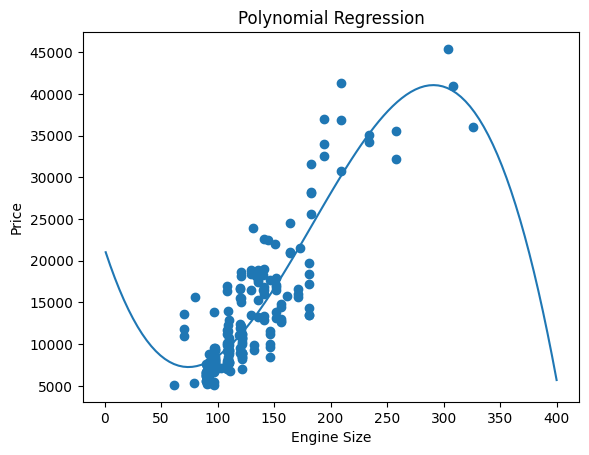

In [55]:
x1 = cars_df['engine-size']
y1 = cars_df['price']

polymodel = np.poly1d(np.polyfit(x1, y1, 4))
polyline = np.linspace(1, 400, 100)

plt.scatter(x1, y1)
plt.plot(polyline, polymodel(polyline))
plt.title('Polynomial Regression')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [56]:
# Let's calculate the R^2:
from sklearn.metrics import r2_score
model3_rsq = r2_score(y1, polymodel(x1))
print('The R-square is: ', model3_rsq)

The R-square is:  0.7901542502358555


In [57]:
# Let's calculate the MSE:
model3_mse = mean_squared_error(y1, polymodel(x1))
print('The MSE is: ', model3_mse)

The MSE is:  13187054.24501183


### 3.4 Using a Pipeline

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [59]:
# Creating a list of tuples to input as an argument to the pipeline constructor:
Input = [('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)

Z = Z.astype(float) # convert the data type to float to avoid errors

pipe.fit(Z,y1)
ypipe = pipe.predict(Z)
ypipe[0:4]

array([13069.0714197 , 13069.0714197 , 19986.36625849,  9809.37194773])

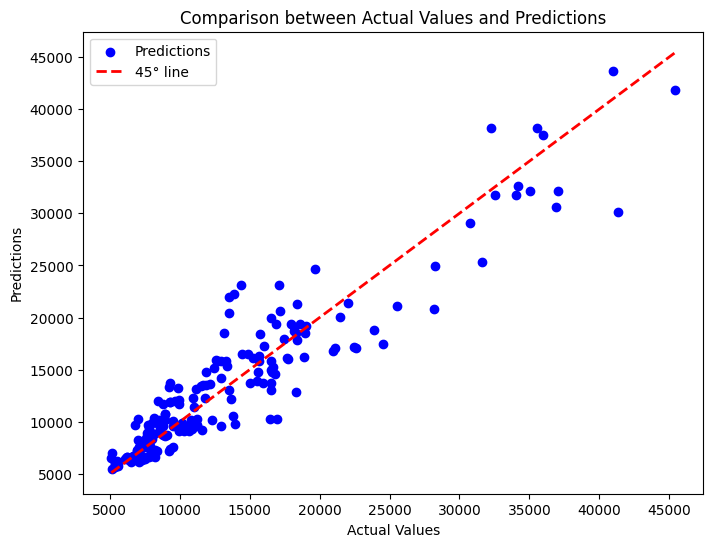

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(y1, ypipe, color='blue', label='Predictions')
plt.plot([min(y1), max(y1)], [min(y1), max(y1)], color='red', linestyle='--', lw=2, label='45° line')
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Comparison between Actual Values and Predictions')
plt.legend()
plt.show()

In [75]:
# Calculate MSE
model4_mse = mean_squared_error(y1, ypipe)

# Calculate R-squared
model4_rsq = r2_score(y1, ypipe)

# Display results
print('Mean Squared Error (MSE):', model4_mse)
print('R-squared:', model4_r_squared)

Mean Squared Error (MSE): 7366878.615303771
R-squared: 0.8827707736900664


### 3.5 Comparing results of the different models:

In [79]:
print('Model 1: Linear Regression. \nThe r-squared value is: ', model1_rsq,'and the mse is: ', model1_mse,
      '\nModel 2: Multiple Linear Regression. \nThe r-squared value is: ', model2_rsq,'and the mse is: ', model2_mse,
      '\nModel 3: Polynomial Regression. \nThe r-squared value is: ', model3_rsq,'and the mse is: ', model3_mse,
      '\nModel 4: Pipeline. \nThe r-squared value is: ', model4_rsq,'and the mse is: ', model4_mse)

Model 1: Linear Regression. 
The r-squared value is:  0.7609686443622008 and the mse is:  15021126.02517414 
Model 2: Multiple Linear Regression. 
The r-squared value is:  0.8159493378567997 and the mse is:  11566048.243724946 
Model 3: Polynomial Regression. 
The r-squared value is:  0.7901542502358555 and the mse is:  13187054.24501183 
Model 4: Pipeline. 
The r-squared value is:  0.8827707736900664 and the mse is:  7366878.615303771


## __4. Model Evaluation__

In [80]:
#Libraries for plotting:
from ipywidgets import interact, interactive, fixed, interact_manual

#Functions for Plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [81]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

### 4.1 Training and Testing

In [82]:
y_data = cars_df['price']
x_data = cars_df.drop('price',axis=1)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
#Using 10% for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)
print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples : 21
Number of training samples: 180


In [85]:
#Creating a Linear Regression object and fitting the model using the feature "horsepower" for :
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [86]:
#Let's calculate the R^2 on the test data:
lre.score(x_test[['horsepower']], y_test)

0.36339478087886834

In [87]:
#Let's calculate the R^2 on the training data.
lre.score(x_train[['horsepower']], y_train)

0.6622424809407366

In [88]:
#Using 30% for testing
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.3, random_state=0)
print("Number of test samples :", x_test1.shape[0])
print("Number of training samples:",x_train1.shape[0])

Number of test samples : 61
Number of training samples: 140


In [89]:
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.6961013584695802

In [90]:
lre.score(x_train1[['horsepower']], y_train1)

0.5970171187604645

### 4.2 Cross-Validation Score

In [91]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [92]:
#Using 4 folds
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.77477095, 0.51725019, 0.74924821, 0.04771764])

In [93]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522246748197947 and the standard deviation is 0.29176230741826387


In [94]:
#Using 3 folds
Rcross1 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=3)
Rcross1

array([0.69056537, 0.61006512, 0.20956081])

In [95]:
print("The mean of the folds are", Rcross1.mean(), "and the standard deviation is" , Rcross1.std())

The mean of the folds are 0.5033971017779333 and the standard deviation is 0.21035667780042158


In [96]:
#Using 5 folds
Rcross2 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=5)
Rcross2

array([ 0.73783959,  0.5600724 , -0.08130909,  0.8786272 , -0.16330413])

In [97]:
print("The mean of the folds are", Rcross2.mean(), "and the standard deviation is" , Rcross2.std())

The mean of the folds are 0.38638519395991716 and the standard deviation is 0.4282256238725917


In [98]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14144.56553323, 14144.56553323, 20819.140433  , 12747.56148444,
       14765.45622158])

### 4.3 Overfitting, Underfitting and Model Selection

In [99]:
#Creating Multiple Linear Regression objects and training the model
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']], y_train)

LinearRegression()

In [100]:
# Prediction using training data:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']])
yhat_train[0:5]

array([ 7505.63999997, 29126.72449992, 15590.30956413,  3222.01697157,
       35327.98102162])

In [101]:
# Prediction using test data:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']])
yhat_test[0:5]

array([11107.81647401,  5978.54117041, 11579.0307139 ,  6194.95038928,
       15272.29765417])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6904\3774465036.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6904\3774465036.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 

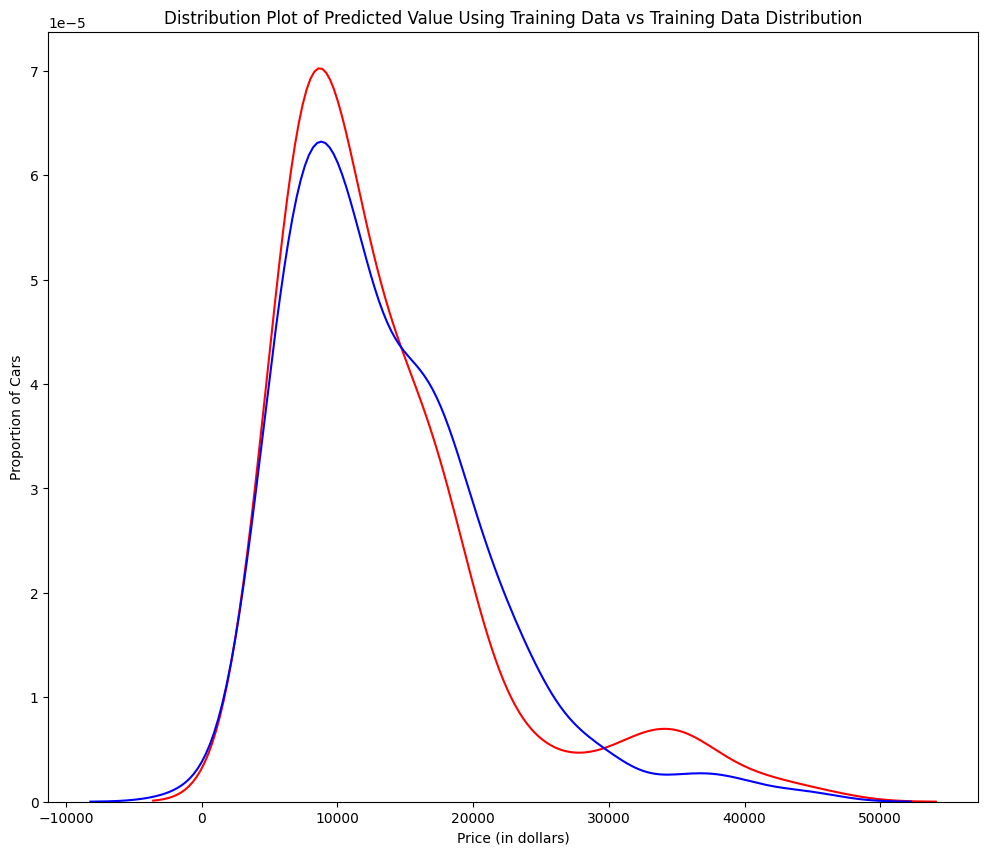

In [102]:
# Examining the distribution of the predicted values of the training data.
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6904\3774465036.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6904\3774465036.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 

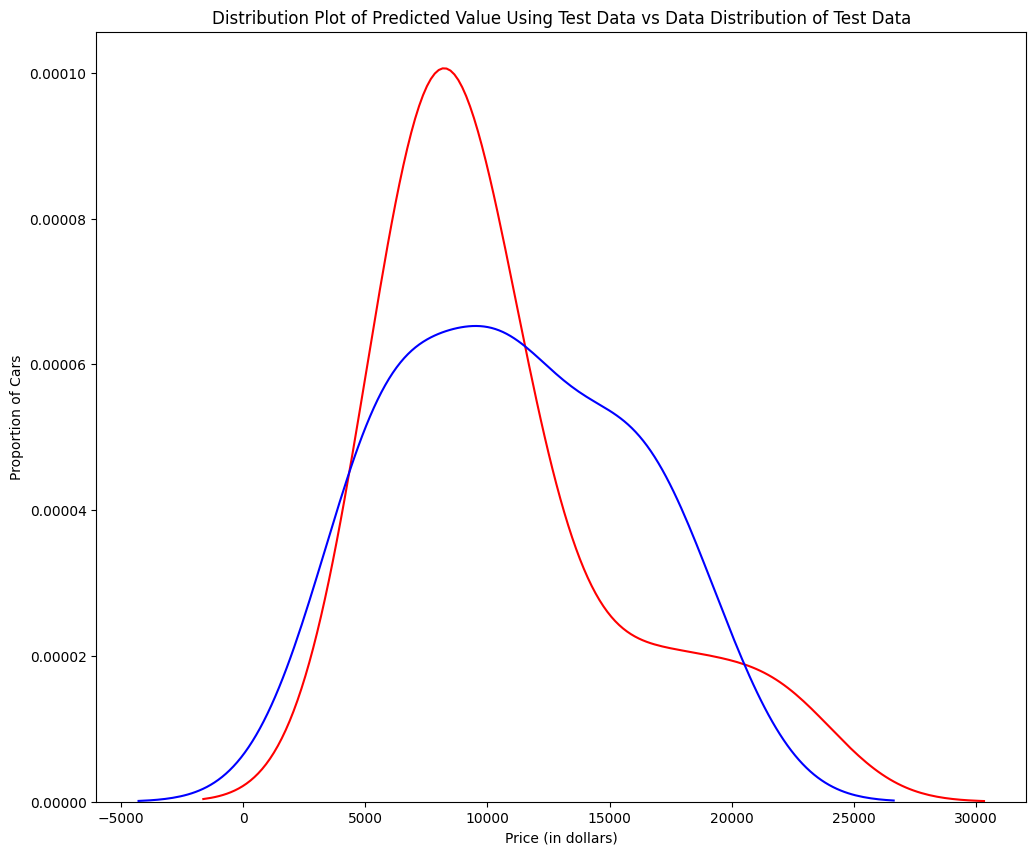

In [103]:
Title='Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [104]:
# Performing polynomial transformations with more than one feature
from sklearn.preprocessing import PolynomialFeatures
pr1=PolynomialFeatures(degree=2)

In [105]:
# Transforming the training and testing samples for the following features
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']])
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km', 'city-L/100km']])
x_train_pr1.shape

(180, 21)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_6904\3774465036.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_6904\3774465036.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 

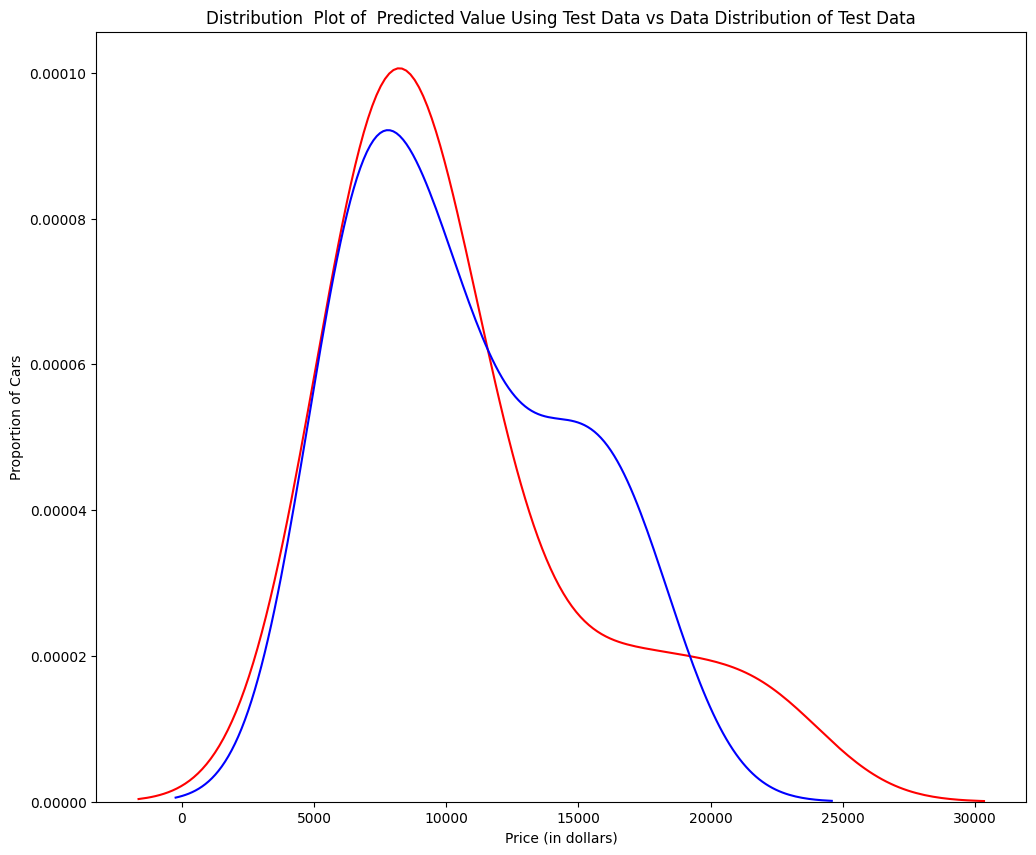

In [106]:
# Creating a linear regression model "poly1"
poly1=LinearRegression().fit(x_train_pr1,y_train)

# Predicting an output on the polynomial features
yhat_test1=poly1.predict(x_test_pr1)

# Using the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [107]:
# The predicted value is lower than actual value for cars where the price is in between $5,000 and $10,000.
# The predicted price is higher than the price cost in the $10,000 to $20,000 range and lower from then on.
# As such the model is not as accurate in these ranges.

### 4.4 Ridge Regression

In [108]:
from sklearn.linear_model import Ridge

In [109]:
# Performing a degree two polynomial transformation on the data.
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km','normalized-losses','symboling']])

In [110]:
# Creating a Ridge regression object, setting the regularization parameter (alpha) to 0.1 and fitting the model
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [111]:
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [10111.08972753  7278.621415   10209.34451418  5412.62098705]
test set : [ 9549.  6229. 10245.  7295.]


In [112]:
# Selecting the value of alpha that minimizes the test error
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|█████████████████████████████████████████| 1000/1000 [00:10<00:00, 96.80it/s, Test Score=0.681, Train Score=0.856]


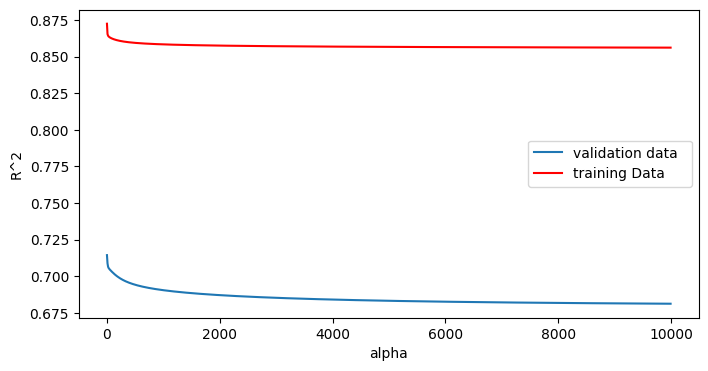

In [113]:
# Plotting out the value of R^2 for different alphas:

width = 8
height = 4
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [114]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.7087766340307333

### 4.5 Grid Search

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
# Creating a dictionary of parameter values:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

In [117]:
# Creating a Ridge regression object:
RR=Ridge()

In [118]:
# Creating a ridge grid search object:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

# Fitting the model:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [119]:
# Obtaining the estimator with the best parameters and assigning it to the variable BestRR
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [120]:
# Testing the model on the test data:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_test)

0.6361490026086497

In [121]:
# Performing a grid search for the alpha parameter, and finding the best values of the parameter:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
Grid2 = GridSearchCV(Ridge(), parameters2, cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_data)
BestRR2 = Grid2.best_estimator_
BestRR2

Ridge(alpha=10000)

In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

# Select only the 4 features expected by Ridge
selected_features = ['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']
x_data_selected = x_data[selected_features]
x_test_selected = x_test[selected_features]

# Scale the selected features
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data_selected)
x_test_scaled = scaler.transform(x_test_selected)

# Performing a degree two polynomial transformation on the selected features
pr = PolynomialFeatures(degree=2)
x_data_pr = pr.fit_transform(x_data_scaled)
x_test_pr = pr.transform(x_test_scaled)

# Creating a dictionary of parameter values for Ridge
parameters_ridge = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

# Creating a Ridge regression object
ridge = Ridge()

# Creating a ridge grid search object
grid_ridge = GridSearchCV(ridge, parameters_ridge, cv=4)

# Fitting the model
grid_ridge.fit(x_data_pr, y_data)

# Obtaining the estimator with the best parameters
best_ridge = grid_ridge.best_estimator_

# Evaluate the performance of the best Ridge model using the test set
score_ridge_test = best_ridge.score(x_test_pr, y_test)

print("Best Ridge Model:")
print("Best Alpha:", best_ridge.alpha)
print("R-squared (Test):", score_ridge_test)

Best Ridge Model:
Best Alpha: 100
R-squared (Test): 0.6830275601401568


In [133]:
# Calculate R-squared and MSE for the Ridge model on the test data
ridge_rsq_test = best_ridge.score(x_test_pr, y_test)
ridge_mse_test = mean_squared_error(y_test, best_ridge.predict(x_test_pr))

# Compare models
print("Model 1: Linear Regression")
print("R-squared:", model1_rsq)
print("MSE:", model1_mse)

print("\nModel 2: Multiple Linear Regression")
print("R-squared:", model2_rsq)
print("MSE:", model2_mse)

print("\nModel 3: Polynomial Regression")
print("R-squared:", model3_rsq)
print("MSE:", model3_mse)

print("\nModel 4: Pipeline")
print("R-squared:", model4_rsq)
print("MSE:", model4_mse)

print("\nModel 5: Ridge Regression (Best Model)")
print("R-squared (Test):", ridge_rsq_test)
print("MSE (Test):", ridge_mse_test)

Model 1: Linear Regression
R-squared: 0.7609686443622008
MSE: 15021126.02517414

Model 2: Multiple Linear Regression
R-squared: 0.8159493378567997
MSE: 11566048.243724946

Model 3: Polynomial Regression
R-squared: 0.7901542502358555
MSE: 13187054.24501183

Model 4: Pipeline
R-squared: 0.8827707736900664
MSE: 7366878.615303771

Model 5: Ridge Regression (Best Model)
R-squared (Test): 0.6830275601401568
MSE (Test): 7018453.392204377


## __5. Conclusion__

In this notebook, different models to predict the car's price based on various features were explored and compared. 
The evaluated models include:

1. Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression
4. Pipeline (Combining Polynomial Features with Ridge Regularization)
5. Ridge Regression (Best Model)

The evaluation results on the test data revealed that the best model for predicting the car's price is the "Pipeline" model, which combines polynomial features with Ridge regularization. It achieved the highest R-squared value and the lowest Mean Squared Error (MSE) compared to other models, indicating superior performance.

The "Pipeline" model can be utilized to make accurate predictions for car prices based on the provided features. However, it's essential to continue monitoring and refining the model's performance as new data becomes available.

Thanks for following along!
